In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn import tree

In [2]:
df = pd.read_csv('Phishing_Legitimate_full.csv') 

In [3]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
df.shape

(10000, 50)

In [5]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [6]:
for col in df.columns:
    unique_value_list = df[col].unique()
    print(f'{col} {unique_value_list}')

id [    1     2     3 ...  9998  9999 10000]
NumDots [ 3  2  1  8  5  4  6 12  7 14 13 15 10 16  9 11 21]
SubdomainLevel [ 1  0  7  4  2 11  3  8  6  5 14  9 10]
PathLevel [ 5  3  2  6  4  1 10  7  9  8  0 11 13 14 15 12 18 16]
UrlLength [ 72 144  58  79  46  42  60  30  76  64  47  61  35  73  50  59  28  32
  52  62 105  55 134  43 210 135  85  80  44  95 100 111  29  37  49  34
  53  45  65 182  39  41 142  51  48 129 184 133 120  63  57 153  67  40
 139  70 149 152  82  25 212  68  38  89  90  54 172 164 191  56  33  36
 187  69  83  74  86 123  84  92  97  98  99 104  71 126 127 132  66 136
 128 146 211  26 101  91  78  88  94 216 102 170 242  75 240 103  81 118
 116 199  24  19 162  87 119 205 165  93 121  27  31 106 140 220  77 110
 197 222 249 163 241 168 231 171 215 138 169 252  22 221 236 225 173  96
 226 219 131 112 176 107 248 115 125 114 113 190 137 141 108 158 200 150
 122 151 192 161 160 154 167 143 148 174 194 195  23 245 175 166 247  20
 117 202 145 188 203 180 179 189

In [7]:
df.drop(['id'],axis=1,inplace=True)

In [8]:
plt.figure(figsize=(100,100))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

<AxesSubplot:>

In [9]:
df=df.drop(['SubdomainLevel','SubdomainLevelRT','PathLength','QueryLength','UrlLengthRT','NumQueryComponents','NumNumericChars','PctExtHyperlinks','PctExtResourceUrlsRT','AbnormalExtFormActionR','PctExtResourceUrlsRT','PctNullSelfRedirectHyperlinks','PctExtResourceUrls'],axis=1)
# df=df.drop(['SubdomainLevel','SubdomainLevelRT','PathLength','QueryLength','UrlLengthRT','NumQueryComponents','NumNumericChars','PctExtHyperlinks','PctExtResourceUrlsRT','AbnormalExtFormActionR','PctExtResourceUrlsRT','PctExtResourceUrls'],axis=1)

In [10]:
df.shape

(10000, 37)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   NumDots                             10000 non-null  int64
 1   PathLevel                           10000 non-null  int64
 2   UrlLength                           10000 non-null  int64
 3   NumDash                             10000 non-null  int64
 4   NumDashInHostname                   10000 non-null  int64
 5   AtSymbol                            10000 non-null  int64
 6   TildeSymbol                         10000 non-null  int64
 7   NumUnderscore                       10000 non-null  int64
 8   NumPercent                          10000 non-null  int64
 9   NumAmpersand                        10000 non-null  int64
 10  NumHash                             10000 non-null  int64
 11  NoHttps                             10000 non-null  int64
 12  Rando

In [12]:
df.describe()

,NumDots,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,...,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.277200,...,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.173400,0.314100,0.500000
std,1.346836,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.117356,...,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.755771,0.897843,0.500025
min,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,0.000000
25%,2.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,0.000000
50%,2.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.500000
75%,3.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000
max,21.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

NumDots                               0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumAmpersand                          0
NumHash                               0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
DoubleSlashInPath                     0
NumSensitiveWords                     0
EmbeddedBrandName                     0
ExtFavicon                            0
InsecureForms                         0
RelativeFormAction                    0
ExtFormAction                         0


In [14]:
for col in df.columns:
    unique_value_list = df[col].unique()
    print(f'{col} {unique_value_list}')

NumDots [ 3  2  1  8  5  4  6 12  7 14 13 15 10 16  9 11 21]
PathLevel [ 5  3  2  6  4  1 10  7  9  8  0 11 13 14 15 12 18 16]
UrlLength [ 72 144  58  79  46  42  60  30  76  64  47  61  35  73  50  59  28  32
  52  62 105  55 134  43 210 135  85  80  44  95 100 111  29  37  49  34
  53  45  65 182  39  41 142  51  48 129 184 133 120  63  57 153  67  40
 139  70 149 152  82  25 212  68  38  89  90  54 172 164 191  56  33  36
 187  69  83  74  86 123  84  92  97  98  99 104  71 126 127 132  66 136
 128 146 211  26 101  91  78  88  94 216 102 170 242  75 240 103  81 118
 116 199  24  19 162  87 119 205 165  93 121  27  31 106 140 220  77 110
 197 222 249 163 241 168 231 171 215 138 169 252  22 221 236 225 173  96
 226 219 131 112 176 107 248 115 125 114 113 190 137 141 108 158 200 150
 122 151 192 161 160 154 167 143 148 174 194 195  23 245 175 166 247  20
 117 202 145 188 203 180 179 189 253 183 109 147 223 201 217 224 229 228
 157 251 156 155 237 159 178 213 244  21 181 130  12  17  15

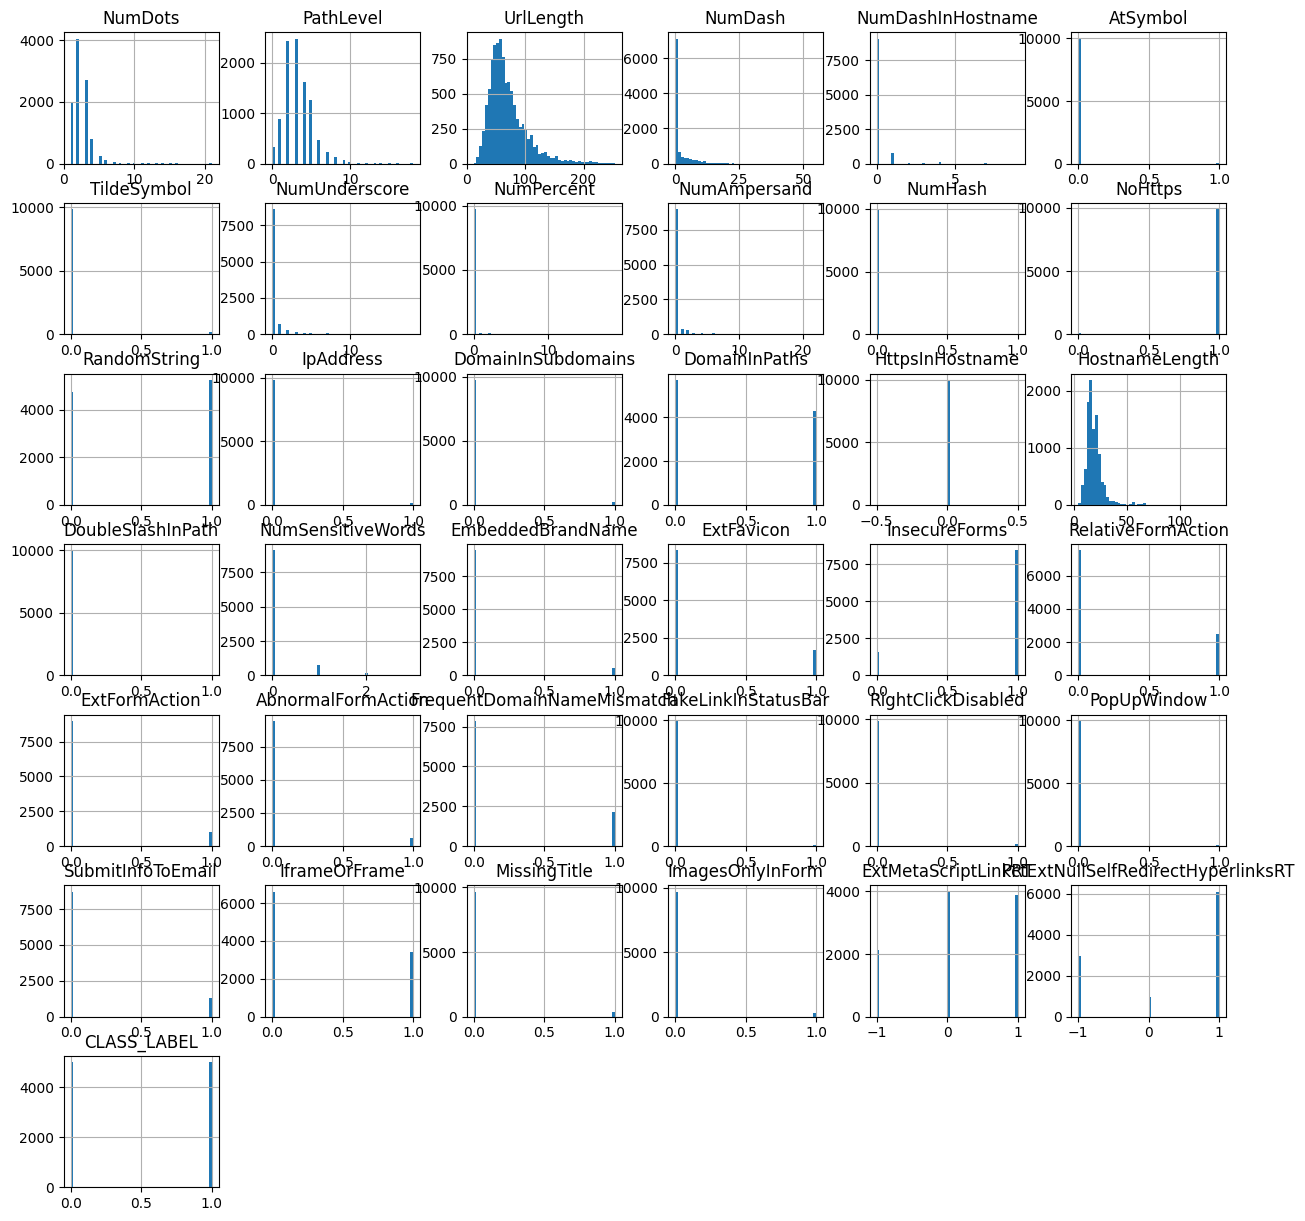

In [15]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

<AxesSubplot:>

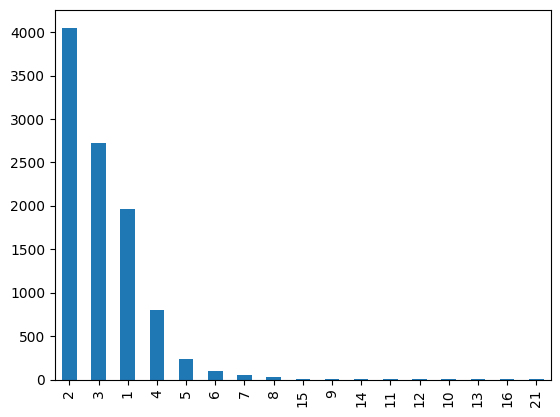

In [16]:
pd.value_counts(df['NumDots']).plot.bar()

<AxesSubplot:>

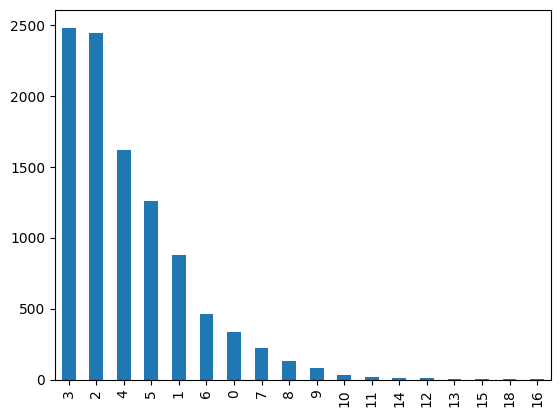

In [17]:
pd.value_counts(df['PathLevel']).plot.bar()

(array([  52.,  355.,  952., 1587., 1759., 1343., 1106.,  738.,  549.,
         419.,  327.,  202.,  156.,   97.,   92.,   45.,   44.,   38.,
          35.,   26.,   29.,   19.,   11.,    8.,   11.]),
 array([ 12.  ,  21.64,  31.28,  40.92,  50.56,  60.2 ,  69.84,  79.48,
         89.12,  98.76, 108.4 , 118.04, 127.68, 137.32, 146.96, 156.6 ,
        166.24, 175.88, 185.52, 195.16, 204.8 , 214.44, 224.08, 233.72,
        243.36, 253.  ]),
 <BarContainer object of 25 artists>)

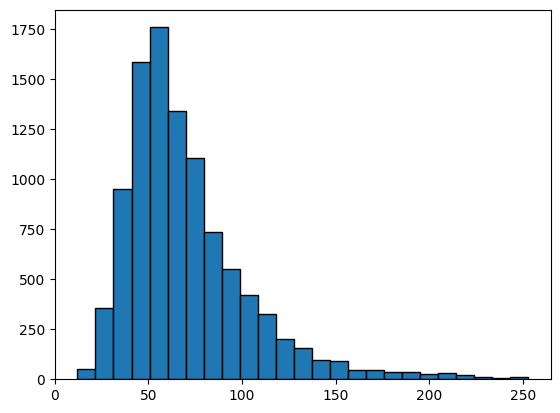

In [18]:
plt.hist(df['UrlLength'],edgecolor='black',bins=25)

<AxesSubplot:>

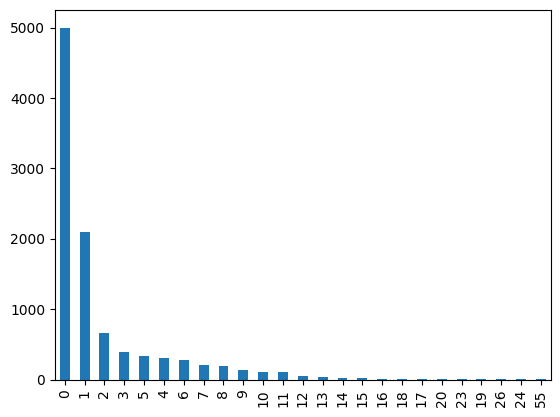

In [19]:
pd.value_counts(df['NumDash']).plot.bar()

<AxesSubplot:>

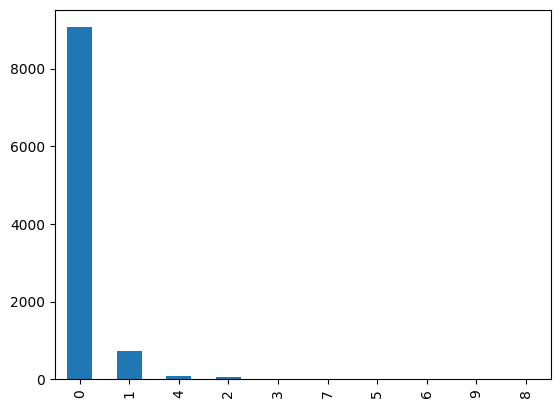

In [20]:
pd.value_counts(df['NumDashInHostname']).plot.bar()

<AxesSubplot:>

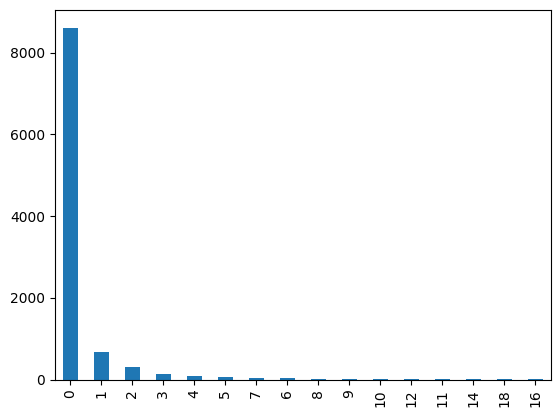

In [21]:
pd.value_counts(df['NumUnderscore']).plot.bar()

<AxesSubplot:>

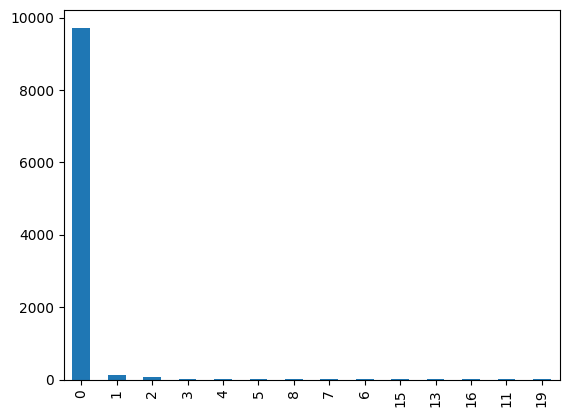

In [22]:
pd.value_counts(df['NumPercent']).plot.bar()

<AxesSubplot:>

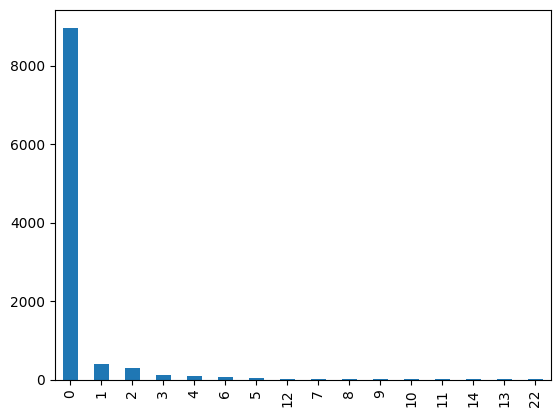

In [23]:
pd.value_counts(df['NumAmpersand']).plot.bar()

(array([4.989e+03, 4.524e+03, 3.300e+02, 8.200e+01, 5.600e+01, 1.000e+01,
        6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  4. ,  17.3,  30.6,  43.9,  57.2,  70.5,  83.8,  97.1, 110.4,
        123.7, 137. ]),
 <BarContainer object of 10 artists>)

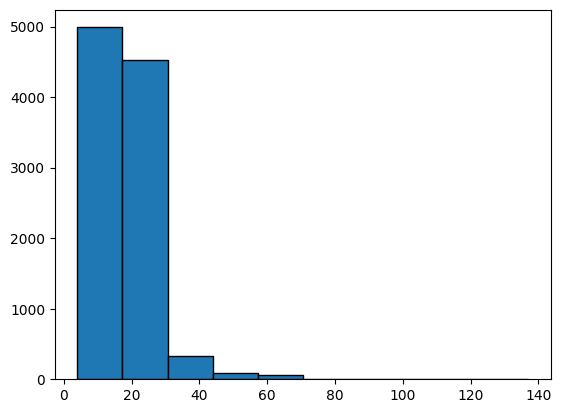

In [24]:
plt.hist(df['HostnameLength'],edgecolor='black',bins=10)

<AxesSubplot:>

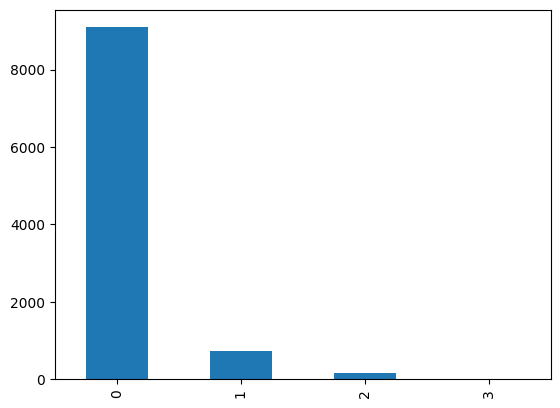

In [25]:
pd.value_counts(df['NumSensitiveWords']).plot.bar()

<AxesSubplot:>

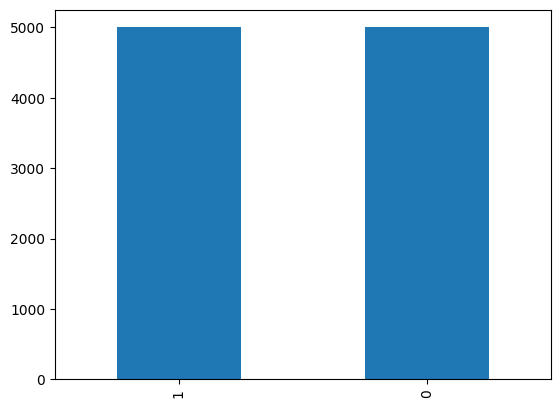

In [26]:
pd.value_counts(df['CLASS_LABEL']).plot.bar()

In [27]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,NumDots,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,...,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,2,5,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1,1
1,2,3,125,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,5,73,8,0,0,0,0,0,0,...,0,0,0,1,1,0,0,-1,-1,0
3,2,7,87,3,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,1,2,72,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
df.describe()

,NumDots,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,...,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.277200,...,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.173400,0.314100,0.500000
std,1.346836,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.117356,...,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.755771,0.897843,0.500025
min,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,0.000000
25%,2.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,0.000000
50%,2.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.500000
75%,3.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000
max,21.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [29]:
df['NumDots']=MinMaxScaler().fit_transform(df[['NumDots']])
df['PathLevel']=MinMaxScaler().fit_transform(df[['PathLevel']])
df['UrlLength']=MinMaxScaler().fit_transform(df[['UrlLength']])
df['NumDash']=MinMaxScaler().fit_transform(df[['NumDash']])
df['NumDashInHostname']=MinMaxScaler().fit_transform(df[['NumDashInHostname']])
df['NumUnderscore']=MinMaxScaler().fit_transform(df[['NumUnderscore']])
df['NumPercent']=MinMaxScaler().fit_transform(df[['NumPercent']])
df['NumAmpersand']=MinMaxScaler().fit_transform(df[['NumAmpersand']])
df['HostnameLength']=MinMaxScaler().fit_transform(df[['HostnameLength']])

In [30]:
df['PctExtNullSelfRedirectHyperlinksRT'] = LabelEncoder().fit_transform(df['PctExtNullSelfRedirectHyperlinksRT'])
df['ExtMetaScriptLinkRT'] = LabelEncoder().fit_transform(df['ExtMetaScriptLinkRT'])

In [31]:
# df['NumSensitiveWords']=df['NumSensitiveWords'].apply(lambda x: 0 if x==0 else 1)
# df['NumAmpersand']=df['NumAmpersand'].apply(lambda x: 0 if x==0 else 1)
# df['NumPercent']=df['NumPercent'].apply(lambda x: 0 if x==0 else 1)
# df['NumUnderscore']=df['NumUnderscore'].apply(lambda x: 0 if x==0 else 1)
# df['NumDashInHostname']=df['NumDashInHostname'].apply(lambda x: 0 if x==0 else 1)
# df['NumDash']=df['NumDash'].apply(lambda x: 0 if x<=1 else 1)
# df['PathLevel']=df['PathLevel'].apply(lambda x: 0 if x<=4 else 1)
# df['NumDots']=df['NumDots'].apply(lambda x: 0 if x<=3 else 1)
# df['UrlLength']=df['UrlLength'].apply(lambda x: 0 if x<=75 else 1)
# df['HostnameLength']=df['HostnameLength'].apply(lambda x: 0 if x<=75 else 1)

In [32]:
for col in df.columns:
    unique_value_list = df[col].unique()
    print(f'{col} {unique_value_list}')

NumDots [0.05 0.   0.1  0.15 0.25 0.4  0.2  0.5  0.35 0.65 0.3  0.7  0.45 0.75
 0.6  0.55 1.  ]
PathLevel [0.27777778 0.16666667 0.38888889 0.11111111 0.44444444 0.22222222
 0.         0.05555556 0.5        0.33333333 0.77777778 0.55555556
 0.83333333 0.66666667 0.61111111 0.72222222 1.         0.88888889]
UrlLength [0.20746888 0.46887967 0.25311203 0.31120332 0.24896266 0.17842324
 0.32365145 0.14107884 0.18257261 0.74273859 0.34024896 0.34854772
 0.24481328 0.0746888  0.17012448 0.23236515 0.2780083  0.12033195
 0.15352697 0.19917012 0.21991701 0.09958506 0.1659751  0.77178423
 0.79253112 0.2033195  0.11618257 0.13692946 0.14937759 0.48547718
 0.23651452 0.28630705 0.12448133 0.19502075 0.26141079 0.03319502
 0.26556017 0.33195021 0.17427386 0.37344398 0.08713693 0.05809129
 0.40248963 0.26970954 0.19087137 0.13278008 0.36929461 0.29460581
 0.15767635 0.18672199 0.06639004 0.48962656 0.29045643 0.14522822
 0.09543568 0.10373444 0.09128631 0.07053942 0.12863071 0.3526971
 0.39419087 0

In [33]:
Y = df['CLASS_LABEL']
X = df.drop('CLASS_LABEL',axis=1)
X.shape, Y.shape

((10000, 36), (10000,))

In [34]:
from sklearn.feature_selection import SelectFwe,f_classif
selector = SelectFwe(f_classif, alpha=0.05)
X_new = pd.DataFrame(selector.fit_transform(X, Y))
X_new.shape

C:\Users\Govind\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Govind\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(10000, 31)

In [35]:
X_new.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.05,0.277778,0.207469,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.05,0.166667,0.468880,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.00,0.277778,0.253112,0.145455,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.05,0.388889,0.311203,0.054545,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0
4,0.00,0.111111,0.248963,0.072727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0


In [36]:
a = selector.get_feature_names_out()
d = dict()
for i in range(0,len(a)):
  d[i]=a[i]
X_new.rename(columns = d, inplace = True)
X_new.head()

,NumDots,PathLevel,UrlLength,NumDash,NumDashInHostname,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,NumHash,...,ExtFormAction,AbnormalFormAction,FrequentDomainNameMismatch,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,0.05,0.277778,0.207469,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.05,0.166667,0.468880,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.00,0.277778,0.253112,0.145455,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.05,0.388889,0.311203,0.054545,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0
4,0.00,0.111111,0.248963,0.072727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0


In [37]:
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)
# X_resampled, Y_resampled = smote_enn.fit_resample(X_new, Y)
# X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=70)

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.2,random_state=70)

In [39]:
#fit the model on train data 
DT2 = DecisionTreeClassifier(max_depth=12).fit(X_train,Y_train)

#predict on train 
train_preds = DT2.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = DT2.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)


Model accuracy on train is:  0.969875
Model accuracy on test is:  0.9485
--------------------------------------------------


In [40]:
# fig = plt.figure(figsize=(300,70))
# _=tree.plot_tree(DT2,feature_names=X_new.columns,rounded=True,filled=True,fontsize=100);
# fig.savefig("decistion_tree.png")

In [41]:
# plt.figure(figsize=(9,7))
# n_features = X_train.shape[1]
# plt.barh(range(n_features), DT2.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()

In [42]:
# from dtreeviz.trees import dtreeviz # remember to load the package

# viz = dtreeviz(DT2, X_new, Y,target_name="Result",feature_names=a,class_names=list(-1,1))
# viz

In [43]:
#fit the model on train data 
RF=RandomForestClassifier(max_depth=20).fit(X_train,Y_train)
#predict on train 
train_preds_rf = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds_rf))

#predict on test
test_preds_rf = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds_rf))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds_rf))

Model accuracy on train is:  0.989875
Model accuracy on test is:  0.961
--------------------------------------------------
KappaScore is:  0.9219455960804681


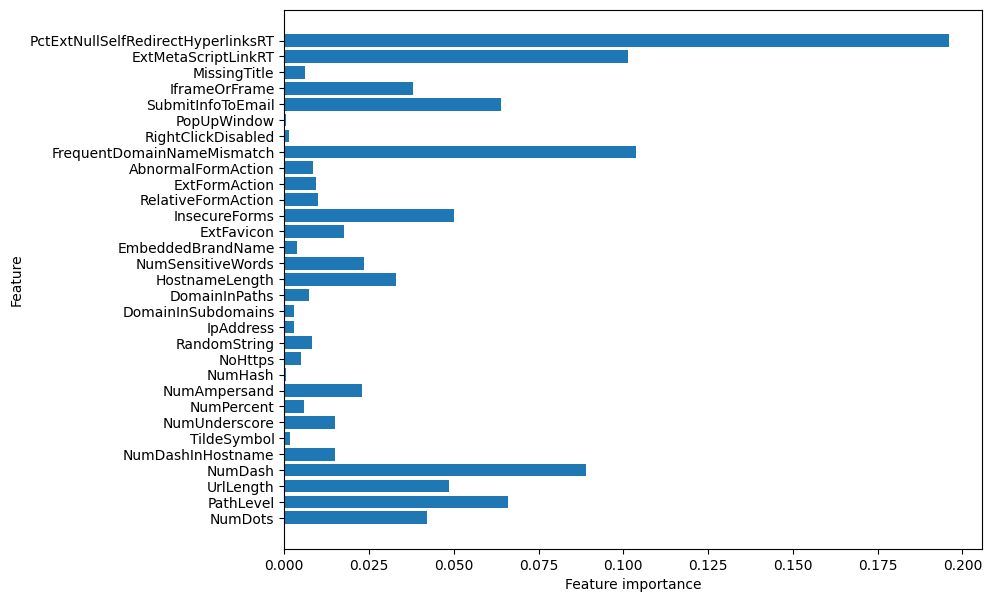

In [44]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), RF.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [45]:
# fig = plt.figure(figsize=(300,200))
# _=tree.plot_tree(RF.estimators_[0],feature_names=X_new.columns,rounded=True,filled=True,fontsize=100);
# fig.savefig("random_forest.png")

In [46]:
#fit the model on train data 
KNN = KNeighborsClassifier(n_neighbors=7).fit(X_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

Model accuracy on train is:  0.953125
Model accuracy on test is:  0.946
--------------------------------------------------
KappaScore is:  0.8919357017425368


In [47]:
#fit the model on train data 
log_reg = LogisticRegression(max_iter=3000).fit(X_train, Y_train)

#predict on train 
train_preds2 = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

Model accuracy on train is:  0.923375
Model accuracy on test is:  0.9165
--------------------------------------------------
KappaScore is:  0.8328010332295431


In [48]:
from lightgbm import LGBMClassifier

In [49]:
lgbm = LGBMClassifier(objective='binary',n_estimators=120)

lgbm.fit(X_train, Y_train)

#predict on train 
train_preds2 = lgbm.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = lgbm.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

Model accuracy on train is:  0.986625
Model accuracy on test is:  0.9625
--------------------------------------------------
KappaScore is:  0.9249438580057883


In [74]:
#fit the model on train data 
clf = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=400,learning_rate=1).fit(X_train,Y_train)
#predict on train 
train_preds5 = clf.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = clf.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

Model accuracy on train is:  0.94975
Model accuracy on test is:  0.95
--------------------------------------------------
KappaScore is:  0.899920036108851


In [91]:
#fit the model on train data 
clf = XGBClassifier(booster="gbtree",max_depth=7,gamma=0.7).fit(X_train,Y_train)
#predict on train 
train_preds5 = clf.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = clf.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

Model accuracy on train is:  0.98775
Model accuracy on test is:  0.9605
--------------------------------------------------
KappaScore is:  0.9209381736517958


In [118]:
#fit the model on train data 
clf = ExtraTreesClassifier(max_depth=21).fit(X_train,Y_train)
#predict on train 
train_preds5 = clf.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = clf.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

Model accuracy on train is:  0.985125
Model accuracy on test is:  0.957
--------------------------------------------------
KappaScore is:  0.9139458719534588
